In [1]:
import pandas as pd

df = pd.read_csv('total_netflix_2023 new.csv')
print(df.shape)
df.head()

(18332, 9)


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."


In [4]:
# Find duplicates
duplicates = df[df.duplicated()]

# Display duplicates
duplicates

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
18242,Wolf // Varg,No,0,0,0,0,0,0,0
18268,You Are the Apple of My Eye // 那些年，我們一起追的女孩,No,0,0,0,0,0,0,0


In [5]:
# Remove duplicates, keeping the first occurrence
df = df.drop_duplicates()

# If you need to reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

df.shape

(18330, 9)

In [2]:
df['Genre'] = df['Genre'].str.replace('[', '').str.replace(']', '').str.replace("'", "")
df['Type'] = df['Title'].str.contains('Season', case=False, na=False).map({True: 'TV Show', False: 'Movie'})
df[0:30]

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,Short,"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"Drama, History, Romance","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"Comedy, Romance","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."
5,You: Season 4,Yes,2023-02-09,440600000,3323.0,7.9,"Action, Crime, Drama","producer,three word title,headstrong,arranged ...",Retired ex national team female handball playe...
6,La Reina del Sur: Season 3,No,2022-12-30,429600000,5216.0,5.7,"Comedy, Drama, Romance","female protagonist,assassin,daughter,danger,fight",Wife and mother Miriam begins a downward emoti...
7,Outer Banks: Season 3,Yes,2023-02-23,402500000,35.0,7.6,"Short, Comedy","teacher,tutor,mother daughter relationship,kor...",Brilliant but disgraced detective John Luther ...
8,Ginny & Georgia: Season 1,Yes,2021-02-24,302100000,44102.0,5.6,"Action, Thriller","close up of eye,close up of eyes,close up of l...",After barely surviving his grievous wounds fro...
9,FUBAR: Season 1,Yes,2023-05-25,266200000,3963.0,7.8,"Comedy, Drama, Romance","psychological thriller,serial killer,ice,cyber...",Dark forces conspire against orphan mapmaker A...


In [6]:
df['Hours Viewed'] = pd.to_numeric(df['Hours Viewed'].str.replace(',', ''), errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'].str.replace(',', ''), errors='coerce')

In [33]:
# Normalize each factor to a 0-100 scale
df['normalized_hours_viewed'] = (df['Hours Viewed'] - df['Hours Viewed'].min()) / (df['Hours Viewed'].max() - df['Hours Viewed'].min()) * 100
df['normalized_number_of_ratings'] = (df['Number of Ratings'] - df['Number of Ratings'].min()) / (df['Number of Ratings'].max() - df['Number of Ratings'].min()) * 100
df['normalized_rating'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min()) * 100

# Assuming 'Release Date' is already converted to datetime
# Newer titles could be scored higher based on recency, if desired
current_date = pd.to_datetime('today')
df['days_since_release'] = (current_date - df['release_date_parsed']).dt.days
df['normalized_recency'] = (df['days_since_release'] - df['days_since_release'].min()) / (df['days_since_release'].max() - df['days_since_release'].min()) * 100
df['normalized_recency'] = 100 - df['normalized_recency']  # Invert so that more recent = higher score

# Create a weighted average of these scores for a composite 'popularity score'
weights = {'hours_viewed': 0.4, 'number_of_ratings': 0.3, 'rating': 0.2, 'recency': 0.1}
df['popularity_score'] = (df['normalized_hours_viewed'] * weights['hours_viewed'] +
                          df['normalized_number_of_ratings'] * weights['number_of_ratings'] +
                          df['normalized_rating'] * weights['rating'] +
                          df['normalized_recency'] * weights['recency'])

In [34]:
df

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,release_date_parsed,normalized_hours_viewed,normalized_number_of_ratings,normalized_rating,days_since_release,normalized_recency,popularity_score
0,The Night Agent: Season 1,1,2023-03-23,812100000.0,7696.0,6.0,"[Biography, Drama, History]","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,2023-03-23,100.000000,0.397184,60.0,294.0,97.953700,61.914525
1,Ginny & Georgia: Season 2,1,2023-01-05,665100000.0,5216.0,5.7,"[Comedy, Drama, Romance]","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",2023-01-05,81.898781,0.269194,57.0,371.0,96.362133,53.876484
2,The Glory: Season 1 // 더 글로리: 시즌 1,1,2022-12-30,622800000.0,11869.0,8.4,[Short],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...,2022-12-30,76.690063,0.612550,84.0,377.0,96.238115,57.283601
3,Wednesday: Season 1,1,2022-11-23,507700000.0,50077.0,7.4,"[Drama, History, Romance]","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...,2022-11-23,62.516931,2.584434,74.0,414.0,95.473336,50.129436
4,Queen Charlotte: A Bridgerton Story,1,2023-05-04,503000000.0,45624.0,6.6,"[Comedy, Romance]","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as...",2023-05-04,61.938185,2.354618,66.0,252.0,98.821827,48.563842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18325,راس السنة,0,0,0.0,0.0,0.0,NaN,0,0,NaT,0.000000,0.000000,0.0,NaN,NaN,NaN
18326,心が叫びたがってるんだ。,0,0,0.0,0.0,0.0,NaN,0,0,NaT,0.000000,0.000000,0.0,NaN,NaN,NaN
18327,두근두근 내 인생,0,0,0.0,0.0,0.0,NaN,0,0,NaT,0.000000,0.000000,0.0,NaN,NaN,NaN
18328,라디오 스타,0,0,0.0,0.0,0.0,NaN,0,0,NaT,0.000000,0.000000,0.0,NaN,NaN,NaN


In [3]:
print(df.isnull().sum())
print()
print(df.dtypes)
print()
print(df.describe())
print()
print(df.duplicated().sum())

Title                  0
Available Globally?    0
Release Date           0
Hours Viewed           0
Number of Ratings      0
Rating                 0
Genre                  0
Key Words              0
Description            0
dtype: int64

Title                  object
Available Globally?    object
Release Date           object
Hours Viewed           object
Number of Ratings      object
Rating                 object
Genre                  object
Key Words              object
Description            object
dtype: object

                                     Title Available Globally? Release Date  \
count                                18332               18332        18332   
unique                               18214                   2         1667   
top     Perfect Strangers // Známi neznámi                  No            0   
freq                                     4               13798         3693   

       Hours Viewed Number of Ratings Rating   Genre Key Words Description  
cou

In [7]:
df['release_date_parsed'] = pd.to_datetime(df['Release Date'], errors='coerce', infer_datetime_format=True)

# Find rows where the date conversion failed
problematic_rows = df[df['release_date_parsed'].isna()]

# Display the problematic rows to investigate
print(problematic_rows['Release Date'])

4879     Release Date
9759     Release Date
14639               0
14640               0
14641               0
             ...     
18325               0
18326               0
18327               0
18328               0
18329               0
Name: Release Date, Length: 3693, dtype: object


/var/folders/2k/zpwd6v4x71xbykdxkcyd8zvr0000gn/T/ipykernel_19472/2538835731.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['release_date_parsed'] = pd.to_datetime(df['Release Date'], errors='coerce', infer_datetime_format=True)


/var/folders/2k/zpwd6v4x71xbykdxkcyd8zvr0000gn/T/ipykernel_19472/2907656236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['release_year'] = df_clean['release_date_parsed'].dt.year


NameError: name 'plt' is not defined

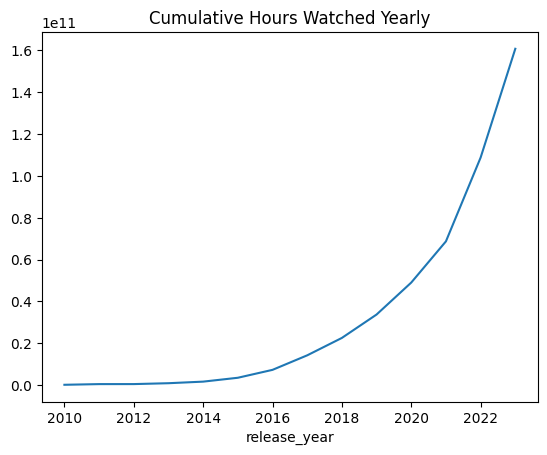

In [8]:
# Remove rows with NaT in 'release_date_parsed'
df_clean = df.dropna(subset=['release_date_parsed'])

# Extract the year from the cleaned 'release_date_parsed'
df_clean['release_year'] = df_clean['release_date_parsed'].dt.year

# Group by year and sum the hours watched
yearly_hours = df_clean.groupby('release_year')['Hours Viewed'].sum()

# Calculate the cumulative sum
cumulative_hours = yearly_hours.cumsum()

# Plotting
cumulative_hours.plot(kind='line', title='Cumulative Hours Watched Yearly')
plt.xlabel('Year')
plt.ylabel('Cumulative Hours Watched')
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Replace '0' or any other placeholder values with np.nan
df['Genre'] = df['Genre'].replace('0', np.nan)

# Now, convert only the non-null values to strings and split by commas
df['Genre'] = df['Genre'].dropna().astype(str).str.split(',')

# If you want to keep rows with '0' as a separate category, you can convert it to a string instead of NaN
# df['Genre'] = df['Genre'].replace('0', 'Unknown')

# Check the first few rows to confirm the column looks correct
print(df['Genre'].head())

0    [Biography,  Drama,  History]
1        [Comedy,  Drama, Romance]
2                          [Short]
3      [Drama,  History,  Romance]
4               [Comedy,  Romance]
Name: Genre, dtype: object


In [10]:
df[50:100]

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,release_date_parsed
50,Bloodhounds: Season 1 // 사냥개들: 시즌 1,Yes,2020-12-25,136600000.0,111361.0,7.6,"[Action, Adventure, Drama]","anglo saxon,kingdom,exploration,warrior,epic",Based on the true story of a father and son wh...,2020-12-25
51,Glass Onion: A Knives Out Mystery,Yes,2020-05-31,136200000.0,155.0,6.4,[Documentary],"fast,based on video game,sonic the hedgehog,an...",Charlie Brandis leads a quiet and uneventful l...,2020-05-31
52,Wrong Side of the Tracks: Season 2 // Entrevía...,No,2022-06-29,135900000.0,16.0,7.2,[Comedy],"library,hero,genius,school,singing","A non-canon, atmospheric look at the stylistic...",2022-06-29
53,Black Mirror: Season 6,Yes,2023-01-27,134800000.0,102.0,4.9,[Horror],"lawyer,spin off,psychosomatic illness,criminal...",It follows the rise and fall of the American f...,2023-01-27
54,Triptych: Season 1 // Tríada: Temporada 1,Yes,2022-05-27,133600000.0,174.0,6.4,"[Drama, Western]","1910s,anti war,shell shock,ptsd post traumatic...",Short documentary about making the second seas...,2022-05-27
55,The Walking Dead: Season 11,No,2022-04-20,133500000.0,3323.0,7.9,"[Action, Crime, Drama]","young,teenager,young boy,teenage boy,mexico","Coral, Wendy and Gina go on the run in search ...",2022-04-20
56,Bridgerton: Season 1,Yes,2022-03-25,133400000.0,14591.0,9.2,"[Drama, Horror, Sci-Fi]","title co written by female,title co directed b...",Charlie Brandis leads a quiet and uneventful l...,2022-03-25
57,CoComelon: Season 1,No,2021-06-25,126400000.0,1544.0,6.1,"[Animation, Short, Adventure]","character name as title,theodore roosevelt cha...","As the Medellin Cartel crumbles, Pablo Escobar...",2021-06-25
58,Extraordinary Attorney Woo: Season 1 // 이상한 변호...,Yes,2023-02-24,124400000.0,3873.0,5.8,"[Crime, Drama, Mystery]","female assassin,gay,lgbt,lesbian,daughter",Columnist Beatrice Blair dispenses love advice...,2023-02-24
59,The Snow Girl: Season 1 // La chica de nieve: ...,Yes,2018-12-26,123500000.0,7627.0,5.2,"[Comedy, Drama, Music]","thief,heist,chase,rivalry,art",Charlie Brandis leads a quiet and uneventful l...,2018-12-26


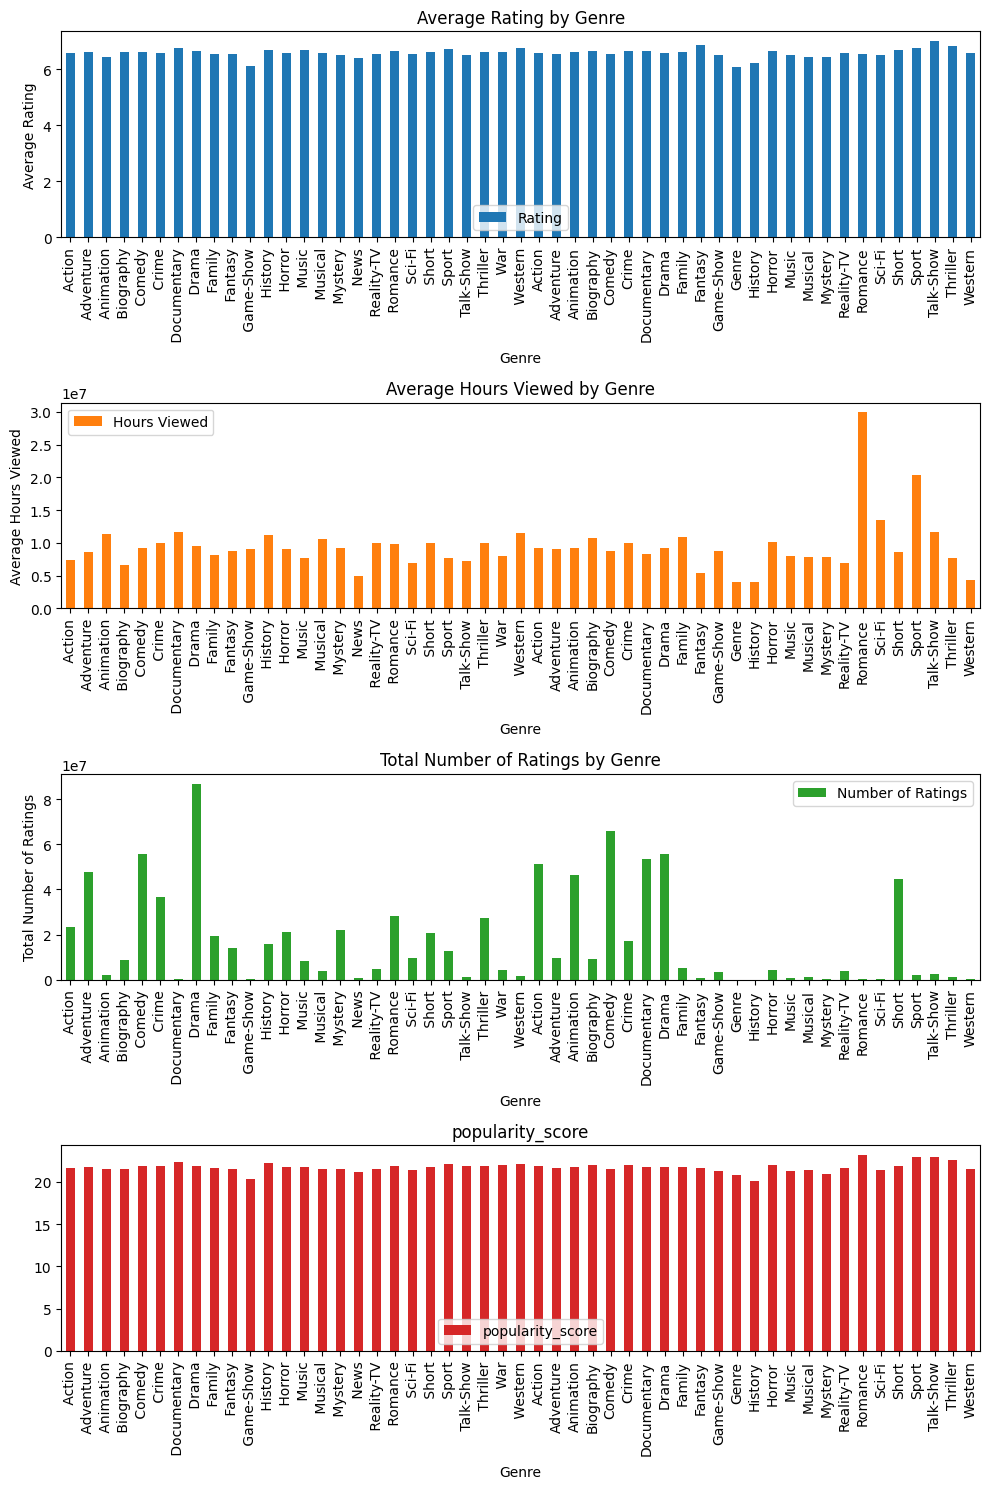

In [40]:
import matplotlib.pyplot as plt

# Splitting the 'Genre' column into separate rows
#df['Genre'] = df['Genre'].astype(str).str.split(',')
df_exploded = df.explode('Genre')

# Group by Genre and calculate required statistics
genre_stats = df_exploded.groupby('Genre').agg({'Rating': 'mean', 'Hours Viewed': 'mean', 'Number of Ratings': 'sum', 'popularity_score': 'mean'})

# Plotting these statistics can be done in multiple ways, e.g., bar plots
axes = genre_stats.plot(kind='bar', subplots=True, layout=(4, 1), figsize=(10, 15), sharex=False)

# Set individual titles and labels for each subplot
axes[0][0].set_title('Average Rating by Genre')
axes[0][0].set_xlabel('Genre')
axes[0][0].set_ylabel('Average Rating')

axes[1][0].set_title('Average Hours Viewed by Genre')
axes[1][0].set_xlabel('Genre')
axes[1][0].set_ylabel('Average Hours Viewed')

axes[2][0].set_title('Total Number of Ratings by Genre')
axes[2][0].set_xlabel('Genre')
axes[2][0].set_ylabel('Total Number of Ratings')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [12]:
display(df.iloc[14639])

Title                                       Aftermath // Lad de små børn
Available Globally?                                                   No
Release Date                                                           0
Hours Viewed                                                         0.0
Number of Ratings                                                21137.0
Rating                                                               6.7
Genre                                       [Animation,  Short,  Action]
Key Words              wanting parents back together,motherhood,polic...
Description            They could sent robots. Instead, They send Rab...
release_date_parsed                                                  NaT
Name: 14639, dtype: object

There is a slight tendency that as 'Available Globally?' increases (from not available to available), 'Hours Viewed' also increases, but the relationship is not strong.

In [15]:
import pandas as pd

# Assuming 'Available Globally?' contains Yes/No or similar indicators
# Convert 'Available Globally?' to a binary numeric column where 1 indicates Yes/Available and 0 indicates No/Not available
df_exploded['Available Globally?'] = df_exploded['Available Globally?'].map({'Yes': 1, 'No': 0})

# If 'Available Globally?' already contains boolean values True/False you can directly convert it to int
# df_exploded['Available Globally?'] = df_exploded['Available Globally?'].astype(int)

# Group by 'Genre' and calculate the sum of 'hours viewed' and the mean of 'Available Globally?'
genre_popularity = df_exploded.groupby('Genre').agg({'Hours Viewed': 'sum', 'Available Globally?': 'mean'})

# Now calculate the correlation
correlation = genre_popularity.corr()

# Display the correlation matrix
display(correlation)

                     Hours Viewed  Available Globally?
Hours Viewed             1.000000             0.195908
Available Globally?      0.195908             1.000000


In [16]:
correlation

,Hours Viewed,Available Globally?
Hours Viewed,1.000000,0.195908
Available Globally?,0.195908,1.000000


In [17]:
# Group the data by 'Genre'
grouped = df_exploded.groupby('Genre')

# Define a function to calculate the correlation for each group
def calculate_correlation(group):
    return group['Hours Viewed'].corr(group['Available Globally?'])

# Apply the function to each genre group
genre_correlation = grouped.apply(calculate_correlation)

# Display the correlation by genre
print(genre_correlation.sort_values(ascending=False))

Genre
 Game-Show      0.720571
Sci-Fi          0.519211
Thriller        0.489827
Romance         0.303031
Sport           0.271221
Adventure       0.262827
Game-Show       0.238250
 Western        0.235565
 War            0.223612
Horror          0.200504
 Sci-Fi         0.200307
Family          0.194944
 Talk-Show      0.182074
Crime           0.173185
 Family         0.170196
Musical         0.169871
 Mystery        0.167260
 Romance        0.159914
Action          0.150314
 Sport          0.146316
 Music          0.139752
 History        0.134278
 Crime          0.132311
 Drama          0.131184
 Musical        0.129126
Short           0.122762
 Fantasy        0.122070
 Horror         0.120997
 Reality-TV     0.115812
Biography       0.109694
Comedy          0.102299
 Thriller       0.101192
 Action         0.098452
Documentary     0.096476
Mystery         0.095315
Music           0.091927
 Biography      0.090897
 Animation      0.086605
 Adventure      0.075043
Drama           0.0

/Users/jevans/Documents/data_science/netflix_social/socialscrape_venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/jevans/Documents/data_science/netflix_social/socialscrape_venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [19]:
display(genre_correlation.sort_values(ascending=False))

Genre
 Game-Show      0.720571
Sci-Fi          0.519211
Thriller        0.489827
Romance         0.303031
Sport           0.271221
Adventure       0.262827
Game-Show       0.238250
 Western        0.235565
 War            0.223612
Horror          0.200504
 Sci-Fi         0.200307
Family          0.194944
 Talk-Show      0.182074
Crime           0.173185
 Family         0.170196
Musical         0.169871
 Mystery        0.167260
 Romance        0.159914
Action          0.150314
 Sport          0.146316
 Music          0.139752
 History        0.134278
 Crime          0.132311
 Drama          0.131184
 Musical        0.129126
Short           0.122762
 Fantasy        0.122070
 Horror         0.120997
 Reality-TV     0.115812
Biography       0.109694
Comedy          0.102299
 Thriller       0.101192
 Action         0.098452
Documentary     0.096476
Mystery         0.095315
Music           0.091927
 Biography      0.090897
 Animation      0.086605
 Adventure      0.075043
Drama           0.0

In [29]:
game_show_df = df_exploded[df_exploded['Genre'].str.contains('Game-Show', na=False)]
top_game_shows = game_show_df.sort_values(by='Hours Viewed', ascending=False).head(10)

# Display the top 10 game shows
print(top_game_shows[['Title', 'Hours Viewed']])

                                                   Title  Hours Viewed
4898                            Theo Von: Regular People   214100000.0
4899                  Twentysomethings: Austin: Season 1   209700000.0
4918                 Dad Stop Embarrassing Me!: Season 1   155300000.0
170                     Fauda: Season 4 // פאודה: עונה 4    56000000.0
5055                                             Step Up    54400000.0
206                                               Narvik    48300000.0
10043  Crayon Shin-chan the Movie: Pursuit of the Bal...    37300000.0
5179                                            Uncorked    36000000.0
5196                                     Acrimony (2018)    34000000.0
5204                      Barbie: It Takes Two: Season 2    33400000.0


In [23]:
df['Genre'].value_counts()

Genre
[Comedy]                            1560
[Short]                              905
[Documentary]                        810
[Drama]                              630
[Animation,  Action,  Adventure]     570
                                    ... 
[Action,  Crime,  Sport]               5
[Adventure,  Drama,  Western]          5
[Comedy,  Horror,  Thriller]           5
[Genre]                                4
[Comedy,  Drama, Romance]              1
Name: count, Length: 392, dtype: int64

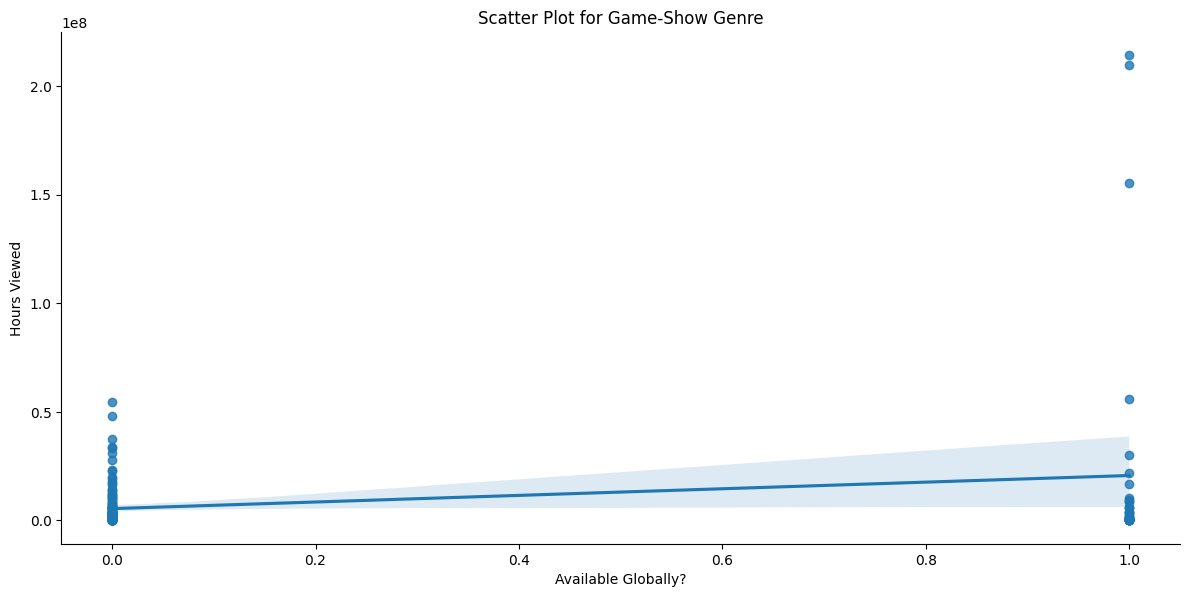

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'Genre' is already exploded and 'Hours Viewed', 'Available Globally?' are numeric
# Plot scatter plot with regression line for a single genre
genre = 'Game-Show'  # Replace with the genre you are interested in
sns.lmplot(x='Available Globally?', y='Hours Viewed', data=df_exploded[df_exploded['Genre'] == genre], aspect=2, height=6)
plt.title(f'Scatter Plot for {genre} Genre')
plt.show()

In [27]:
df_exploded

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,release_date_parsed
0,The Night Agent: Season 1,1,2023-03-23,812100000.0,7696.0,6.0,Biography,"persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,2023-03-23
0,The Night Agent: Season 1,1,2023-03-23,812100000.0,7696.0,6.0,Drama,"persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,2023-03-23
0,The Night Agent: Season 1,1,2023-03-23,812100000.0,7696.0,6.0,History,"persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...,2023-03-23
1,Ginny & Georgia: Season 2,1,2023-01-05,665100000.0,5216.0,5.7,Comedy,"producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",2023-01-05
1,Ginny & Georgia: Season 2,1,2023-01-05,665100000.0,5216.0,5.7,Drama,"producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you...",2023-01-05
...,...,...,...,...,...,...,...,...,...,...
18325,راس السنة,0,0,0.0,0.0,0.0,NaN,0,0,NaT
18326,心が叫びたがってるんだ。,0,0,0.0,0.0,0.0,NaN,0,0,NaT
18327,두근두근 내 인생,0,0,0.0,0.0,0.0,NaN,0,0,NaT
18328,라디오 스타,0,0,0.0,0.0,0.0,NaN,0,0,NaT


In [30]:
def top_shows(group):
    # Sort the group by 'Hours Viewed' and select top 10
    top = group.sort_values(by='Hours Viewed', ascending=False).head(10)
    # Concatenate 'Title' and 'Hours Viewed' into a single string for each show
    top['Show_Info'] = top['Title'] + ' (' + top['Hours Viewed'].astype(str) + ' hours viewed)'
    # Return only the concatenated info
    return top['Show_Info']

# Group by 'Genre' and apply the function to get top shows for each genre
top_shows_by_genre = df_exploded.groupby('Genre').apply(top_shows)

# Reset index to make the DataFrame tidy
top_shows_by_genre = top_shows_by_genre.reset_index(level=1, drop=True).reset_index()

# Rename columns for clarity
top_shows_by_genre.columns = ['Genre', 'Top Shows']

# Display the resulting DataFrame
print(top_shows_by_genre)

       Genre                                          Top Shows
0     Action              You People (181800000.0 hours viewed)
1     Action  The Cabin in the Woods (134800000.0 hours viewed)
2     Action  Kabir Singh // कबीर सिंह (120500000.0 hours vi...
3     Action    The Get Down: Part 2 (120300000.0 hours viewed)
4     Action  Mighty Express: Season 1 (118600000.0 hours vi...
..       ...                                                ...
484  Western  The Undateables (2012): Series 10 (15800000.0 ...
485  Western  Flavorful Origins: Gansu Cuisine // 風味原產地: 甘肅飲...
486  Western  Schitt's Creek: Season 2 (1200000.0 hours viewed)
487  Western            The Code (2009) (300000.0 hours viewed)
488  Western               The Last Exorcism (0.0 hours viewed)

[489 rows x 2 columns]


In [31]:
top_shows_by_genre

,Genre,Top Shows
0,Action,You People (181800000.0 hours viewed)
1,Action,The Cabin in the Woods (134800000.0 hours viewed)
2,Action,Kabir Singh // कबीर सिंह (120500000.0 hours vi...
3,Action,The Get Down: Part 2 (120300000.0 hours viewed)
4,Action,Mighty Express: Season 1 (118600000.0 hours vi...
...,...,...
484,Western,The Undateables (2012): Series 10 (15800000.0 ...
485,Western,Flavorful Origins: Gansu Cuisine // 風味原產地: 甘肅飲...
486,Western,Schitt's Creek: Season 2 (1200000.0 hours viewed)
487,Western,The Code (2009) (300000.0 hours viewed)
